In [ ]:
#!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [3]:
#@title Load coordinates nearest points
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.pipeline import Pipeline
import pickle
from scipy.stats import chi2_contingency

pd.options.display.max_rows = 999


coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/distan_lat41.296lon2.078p2R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [9]:
#@title Load station (present weather). Load meteorological model forecast D0. Display relation BRFG with model variables.
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/LEBLY2018Y2022.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

print("Weather frequencies")
display(station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.2%}'.format(n)))

#label br/fg if weather code contains FG or BR
station["TS_l"] = "No TS"
mask = station['wxcodes_o'].str.contains("TS")
station.loc[mask,["TS_l"]] = "TS"
station["TS_l"]=pd.Categorical(station["TS_l"])

#display(station.sample(50).head(20))
print("*****************************")
print("Climatology TS")
display(station["TS_l"].value_counts(normalize=True).transform(lambda x: '{:,.0%}'.format(x)))

#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/lat41.296lon2.078p2R12KmD0Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020,]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).drop(columns=["wxcodes_o",]).dropna()
#display(df_all)






Weather frequencies


M                 94.43%
-RA                1.96%
-DZ                0.72%
RA                 0.63%
BR                 0.53%
SHRA               0.18%
VCTS               0.14%
-SHRA              0.13%
TSRA               0.12%
VCSH               0.09%
TS                 0.08%
DZ                 0.07%
+RA                0.07%
+TSRA              0.07%
-TSRA              0.06%
-RA BR             0.05%
-RA VCTS           0.05%
BCFG               0.05%
+SHRA              0.04%
BR -RA             0.04%
BR BCFG            0.04%
-RA VCSH           0.03%
FG                 0.03%
VCFG               0.02%
BR -DZ             0.02%
TS -RA             0.02%
VCTS -RA           0.02%
-SHRA VCTS         0.02%
RA VCTS            0.02%
SHRA VCTS          0.01%
+SHRA VCTS         0.01%
-DZ BR             0.01%
RA BR              0.01%
BR RA              0.01%
-RA TS             0.01%
BR DZ              0.01%
TS VCSH            0.01%
BR VCFG            0.01%
VCSH -RA           0.01%
BCFG BR            0.01%


*****************************
Climatology TS


No TS    99%
TS        1%
Name: TS_l, dtype: object

Round 0


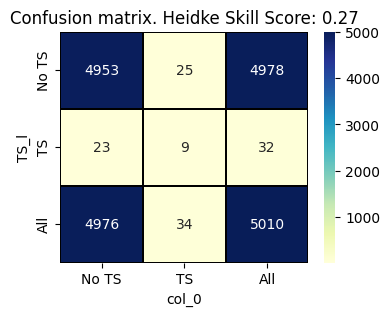

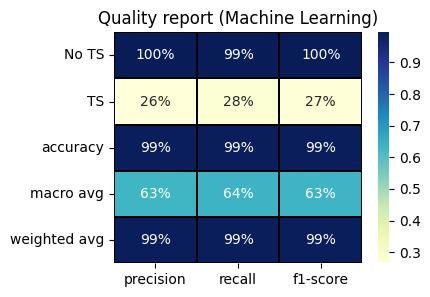

,feature,feature_per
52,dayofyear,3.8%
41,cin1,3.6%
34,lhflx1,3.4%
40,cape1,3.1%
16,cin0,2.8%
25,dir1,2.7%
0,dir0,2.7%
43,cfl1,2.6%
33,visibility1,2.6%
39,shflx1,2.5%


Round 1


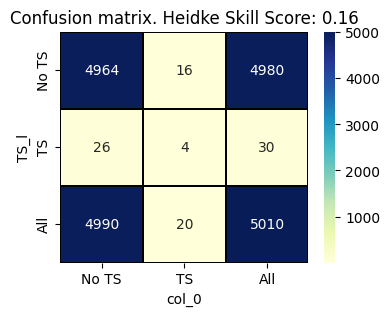

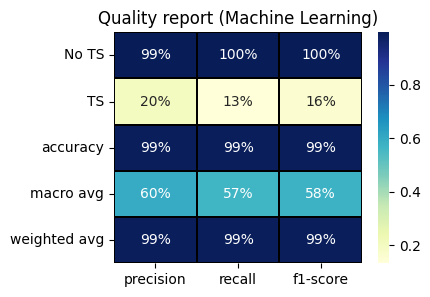

,feature,feature_per
40,cape1,4.3%
41,cin1,3.4%
34,lhflx1,3.3%
25,dir1,3.1%
0,dir0,3.1%
16,cin0,3.0%
15,cape0,2.8%
32,rh1,2.8%
19,cfm0,2.8%
39,shflx1,2.6%


Round 2


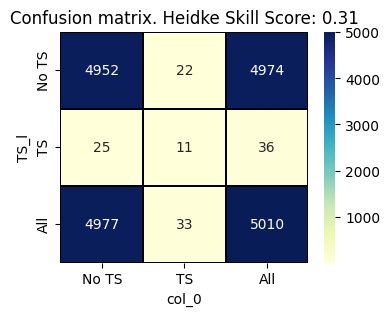

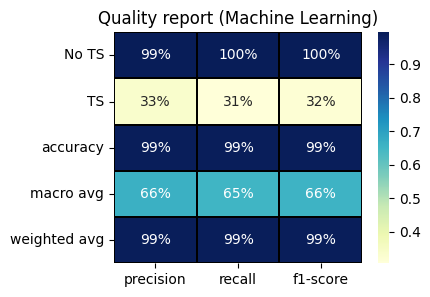

,feature,feature_per
40,cape1,3.8%
41,cin1,3.5%
0,dir0,3.5%
52,dayofyear,3.3%
34,lhflx1,3.0%
15,cape0,3.0%
16,cin0,3.0%
25,dir1,2.8%
19,cfm0,2.8%
42,cfh1,2.6%


Round 3


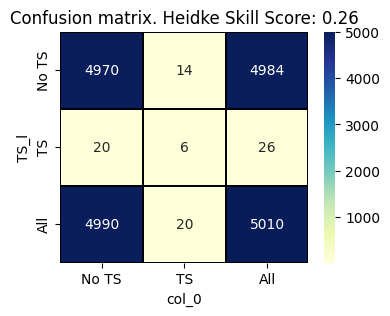

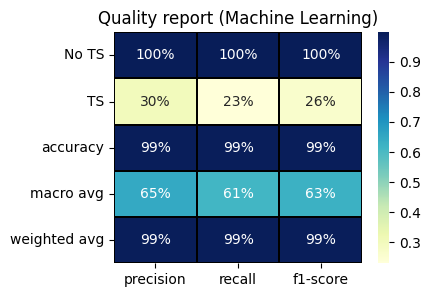

,feature,feature_per
15,cape0,3.5%
40,cape1,3.2%
16,cin0,3.2%
0,dir0,3.1%
52,dayofyear,3.1%
34,lhflx1,3.1%
25,dir1,3.0%
41,cin1,2.9%
44,cfm1,2.7%
18,cfl0,2.7%


Round 4


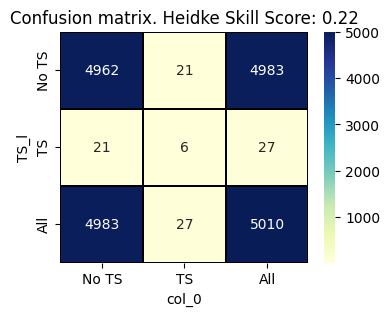

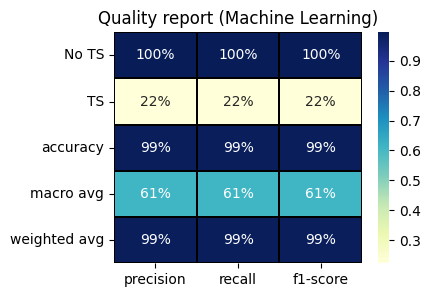

,feature,feature_per
40,cape1,4.7%
41,cin1,3.7%
25,dir1,3.4%
34,lhflx1,3.0%
15,cape0,3.0%
0,dir0,2.9%
52,dayofyear,2.9%
43,cfl1,2.8%
16,cin0,2.8%
50,hour,2.6%


Round 5


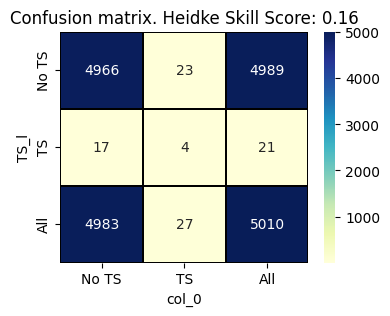

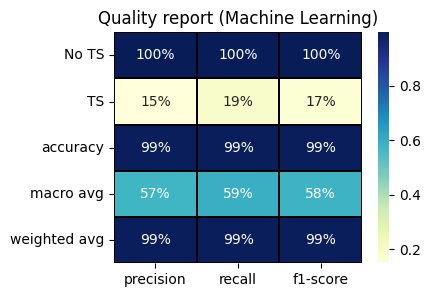

,feature,feature_per
41,cin1,3.6%
0,dir0,3.2%
52,dayofyear,3.2%
40,cape1,3.1%
25,dir1,3.1%
16,cin0,2.9%
34,lhflx1,2.9%
42,cfh1,2.8%
15,cape0,2.8%
48,T5001,2.6%


Round 6


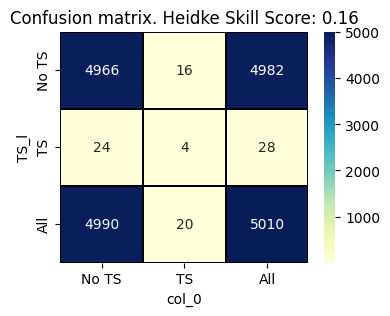

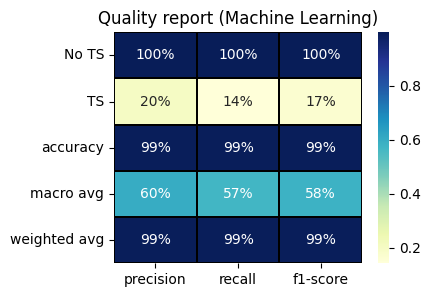

,feature,feature_per
15,cape0,3.9%
52,dayofyear,3.5%
33,visibility1,3.5%
41,cin1,3.2%
40,cape1,3.2%
34,lhflx1,3.1%
50,hour,2.8%
16,cin0,2.7%
25,dir1,2.5%
7,rh0,2.5%


Round 7


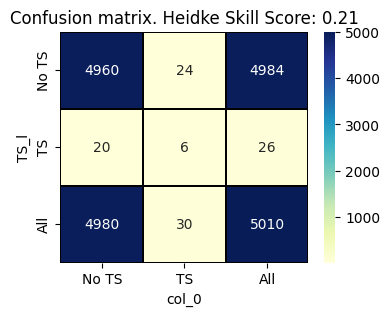

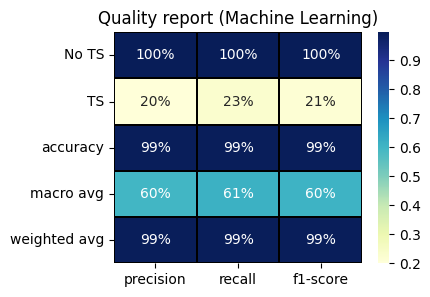

,feature,feature_per
40,cape1,3.6%
52,dayofyear,3.4%
25,dir1,3.4%
16,cin0,3.3%
41,cin1,3.2%
15,cape0,3.0%
33,visibility1,2.9%
0,dir0,2.9%
34,lhflx1,2.9%
44,cfm1,2.6%


Round 8


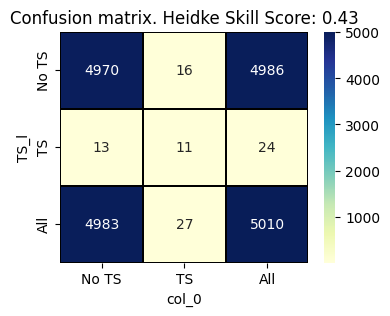

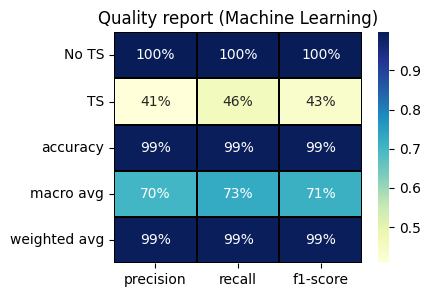

,feature,feature_per
52,dayofyear,3.6%
40,cape1,3.4%
0,dir0,3.4%
41,cin1,3.4%
34,lhflx1,3.2%
16,cin0,2.9%
25,dir1,2.9%
15,cape0,2.8%
33,visibility1,2.6%
19,cfm0,2.5%


Round 9


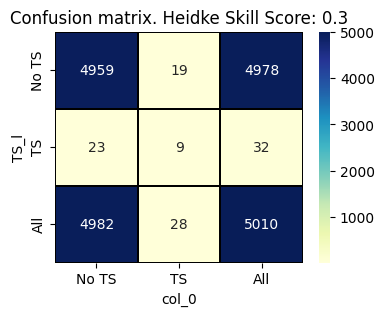

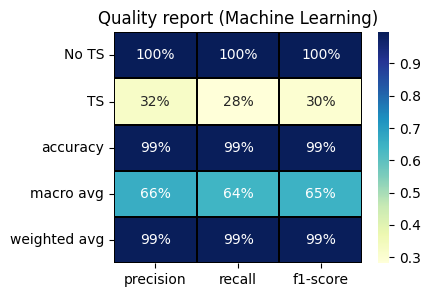

,feature,feature_per
52,dayofyear,3.9%
40,cape1,3.9%
41,cin1,3.4%
19,cfm0,3.3%
25,dir1,3.2%
34,lhflx1,3.0%
0,dir0,2.9%
16,cin0,2.9%
50,hour,2.8%
15,cape0,2.7%



HSS stadistics
             HSS
count  10.000000
mean    0.247317
std     0.085031
min     0.155957
25%     0.174549
50%     0.237763
75%     0.288829
max     0.428474
Shapiro test normality
p value: 0.28289690613746643
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 3.2829983401576906e-87
Significance level: 0.01
Degres of of freedom:  1
Stadistic 391.84477153907795
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.9 minutes


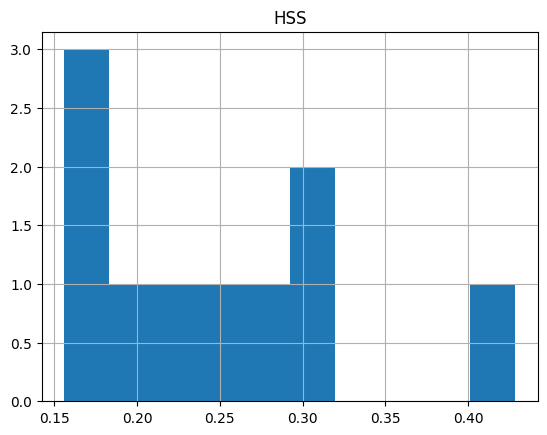

In [7]:
#@title ML LGBMClassifier. Samples 10. Heidke Skill score.

from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.TS_l
X = df_all.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")




In [11]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"HSS_ml":HSS[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/algorithms/ts_LEBL_d0.al", 'wb'))

Round 0


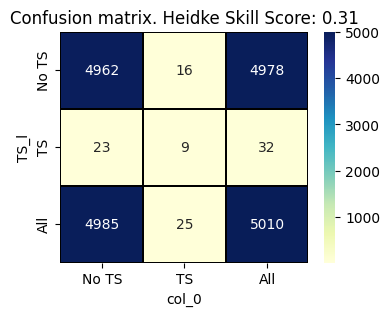

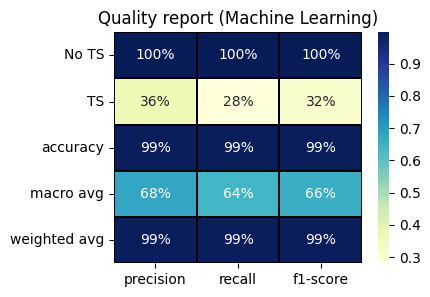

,feature,feature_per
40,cape1,5.4%
10,lwflx0,4.5%
20,cft0,4.5%
15,cape0,4.3%
36,conv_prec1,4.1%
45,cft1,4.1%
0,dir0,3.7%
11,conv_prec0,3.6%
43,cfl1,3.5%
18,cfl0,3.5%


Round 1


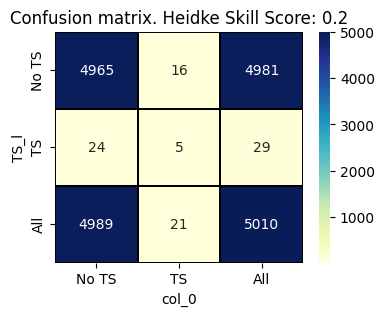

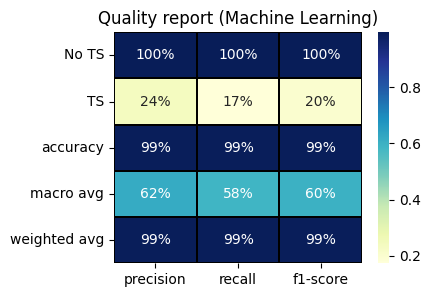

,feature,feature_per
40,cape1,5.6%
19,cfm0,5.1%
11,conv_prec0,4.6%
44,cfm1,4.2%
0,dir0,4.0%
36,conv_prec1,3.9%
15,cape0,3.8%
20,cft0,3.7%
18,cfl0,3.6%
45,cft1,3.5%


Round 2


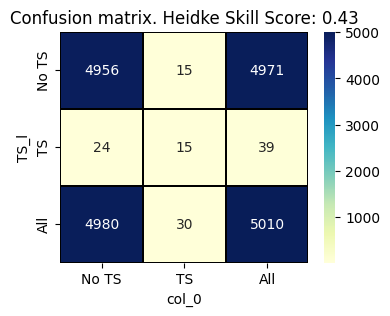

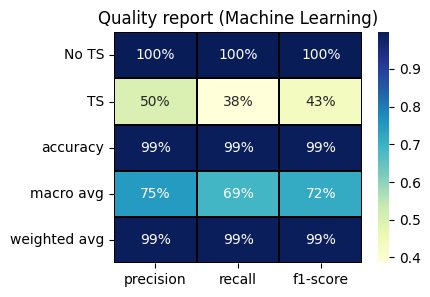

,feature,feature_per
40,cape1,6.1%
11,conv_prec0,6.1%
25,dir1,4.1%
36,conv_prec1,4.0%
0,dir0,4.0%
35,lwflx1,3.7%
15,cape0,3.6%
10,lwflx0,3.5%
18,cfl0,3.5%
44,cfm1,3.2%


Round 3


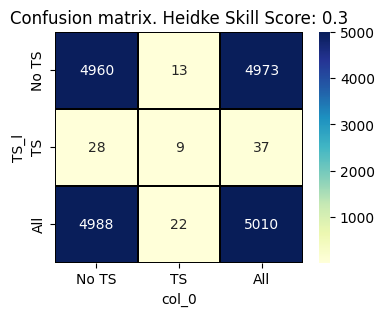

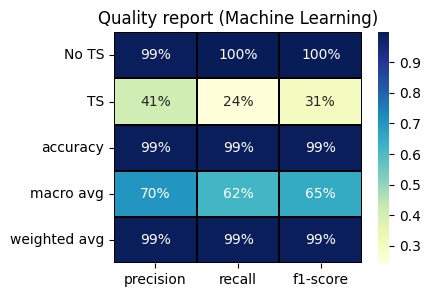

,feature,feature_per
0,dir0,5.3%
15,cape0,5.2%
40,cape1,4.6%
19,cfm0,4.2%
11,conv_prec0,3.9%
20,cft0,3.7%
35,lwflx1,3.7%
36,conv_prec1,3.6%
25,dir1,3.6%
10,lwflx0,3.0%


Round 4


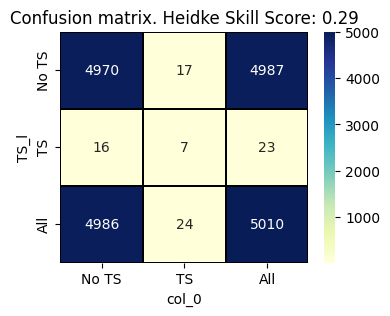

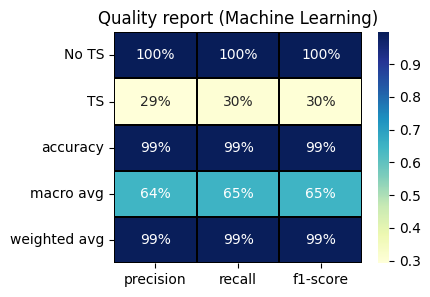

,feature,feature_per
40,cape1,5.1%
11,conv_prec0,4.5%
15,cape0,4.1%
36,conv_prec1,4.0%
43,cfl1,3.9%
12,prec0,3.8%
20,cft0,3.8%
19,cfm0,3.7%
35,lwflx1,3.6%
44,cfm1,3.6%


Round 5


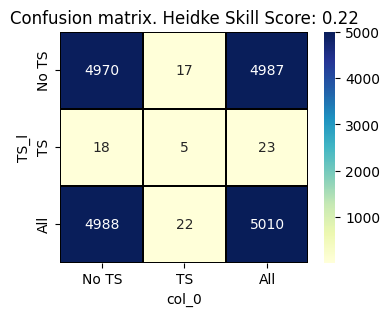

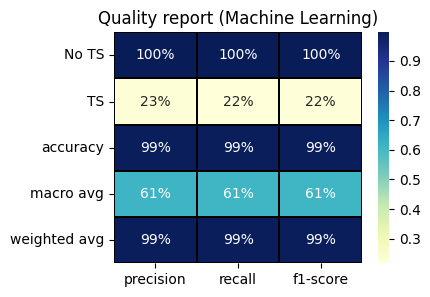

,feature,feature_per
40,cape1,5.0%
10,lwflx0,4.4%
15,cape0,4.4%
35,lwflx1,4.1%
44,cfm1,4.0%
11,conv_prec0,3.9%
0,dir0,3.7%
19,cfm0,3.4%
45,cft1,3.4%
18,cfl0,3.3%


Round 6


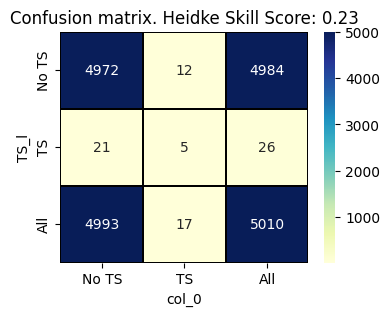

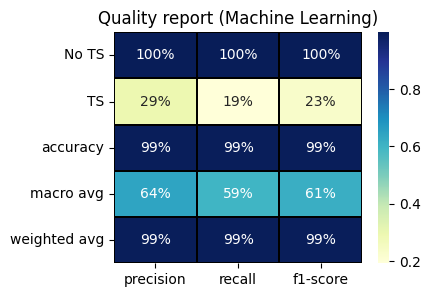

,feature,feature_per
40,cape1,6.1%
15,cape0,4.5%
43,cfl1,4.2%
11,conv_prec0,4.1%
35,lwflx1,3.9%
18,cfl0,3.7%
10,lwflx0,3.6%
36,conv_prec1,3.3%
0,dir0,3.2%
20,cft0,3.2%


Round 7


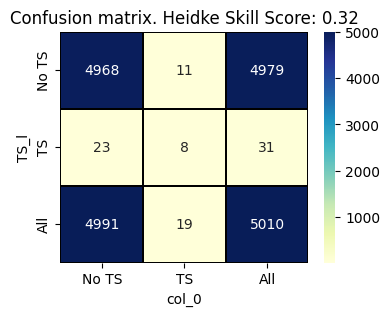

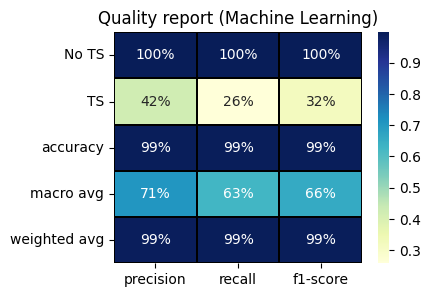

,feature,feature_per
36,conv_prec1,5.0%
15,cape0,4.9%
0,dir0,4.8%
40,cape1,4.8%
20,cft0,4.2%
11,conv_prec0,3.8%
19,cfm0,3.8%
45,cft1,3.7%
44,cfm1,3.6%
18,cfl0,3.4%


Round 8


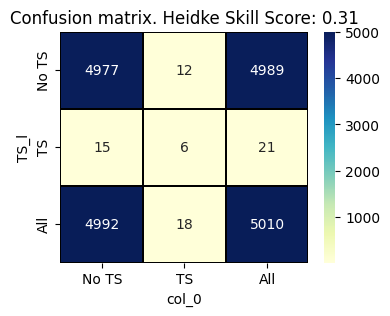

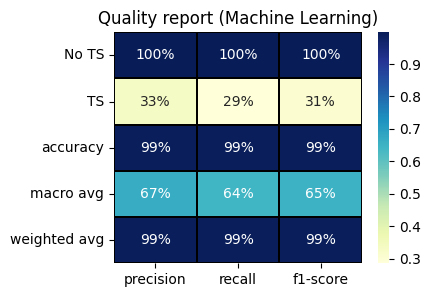

,feature,feature_per
40,cape1,4.8%
11,conv_prec0,4.7%
36,conv_prec1,4.6%
15,cape0,4.1%
35,lwflx1,4.0%
18,cfl0,3.9%
0,dir0,3.9%
45,cft1,3.8%
10,lwflx0,3.6%
20,cft0,3.5%


Round 9


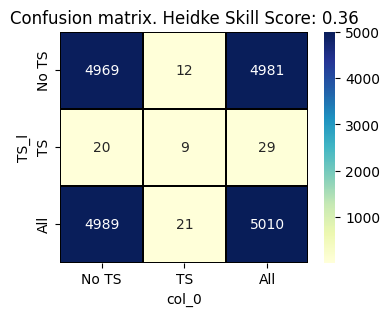

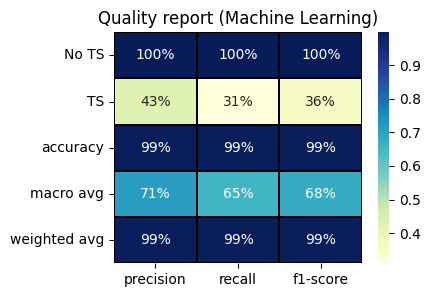

,feature,feature_per
11,conv_prec0,5.4%
40,cape1,4.7%
36,conv_prec1,4.2%
0,dir0,4.2%
20,cft0,4.1%
10,lwflx0,3.9%
18,cfl0,3.9%
45,cft1,3.6%
15,cape0,3.6%
35,lwflx1,3.3%



HSS stadistics
             HSS
count  10.000000
mean    0.296153
std     0.069201
min     0.196091
25%     0.245688
50%     0.303120
75%     0.315574
max     0.430931
Shapiro test normality
p value: 0.5445538759231567
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 7.17987727764475e-129
Significance level: 0.01
Degres of of freedom:  1
Stadistic 583.3006896991086
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.06 minutes


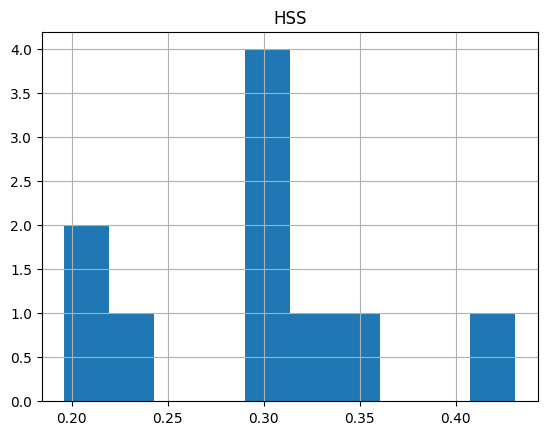

In [12]:
#@title ML RandomForestClassifier. Samples 10. Heidke Skill score.
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

start_time = time.time()

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.TS_l
X = df_all.iloc[:,1:]


# loop random
HSS_E = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  #ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  ml_model = ExtraTreesClassifier().fit(X_res,y_res)
  #ml_model = Perceptron().fit(X_res,y_res)
  #ml_model = RandomForestClassifier().fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_E.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS_E[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_E,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_E)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS_E,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")







In [ ]:
#@title Save last heavy algorithm round 9
x_var = X.columns
score = {"HSS_ml":HSS_E[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/algorithms/TS_LEBL_d0.al", 'wb'))

In [13]:
#@title Load meteorological model forecast D1. Display relation BRFG with model variables.
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/input_files/lat41.296lon2.078p2R12KmD1Y2020.csv",parse_dates=["time"])

model = pd.concat([mody2018,mody2019,mody2020]).drop(columns=["Unnamed: 0"]).set_index("time")

#concat station file versus meteorological model file same time
df_all = pd.concat([station,model],axis=1).drop(columns=["wxcodes_o",]).dropna()
#display(df_all)



Round 0


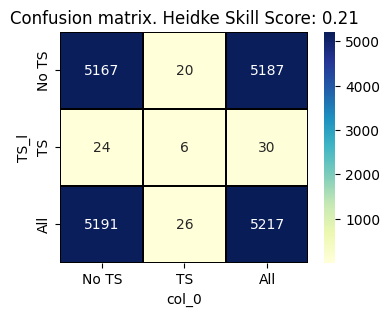

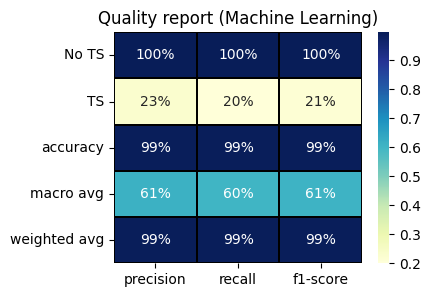

,feature,feature_per
41,cin1,3.8%
40,cape1,3.5%
16,cin0,3.2%
39,shflx1,2.9%
33,visibility1,2.8%
8,visibility0,2.8%
25,dir1,2.8%
23,T5000,2.7%
32,rh1,2.7%
52,dayofyear,2.6%


Round 1


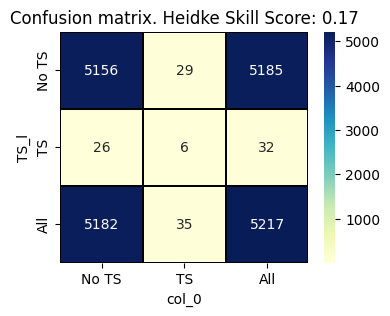

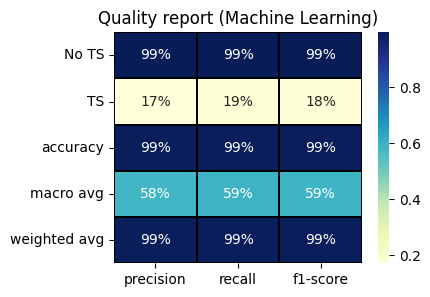

,feature,feature_per
32,rh1,4.6%
41,cin1,3.6%
40,cape1,3.3%
16,cin0,3.2%
25,dir1,3.1%
34,lhflx1,2.9%
52,dayofyear,2.9%
8,visibility0,2.8%
33,visibility1,2.7%
0,dir0,2.6%


Round 2


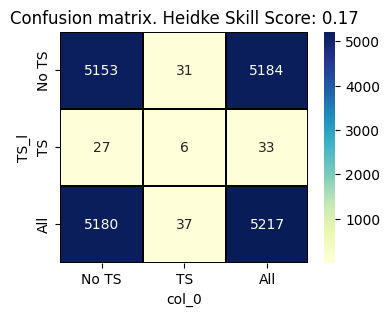

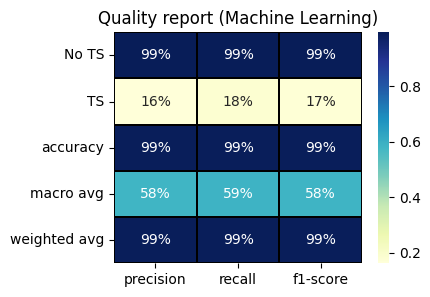

,feature,feature_per
16,cin0,4.0%
25,dir1,3.2%
41,cin1,3.0%
8,visibility0,2.9%
34,lhflx1,2.9%
40,cape1,2.9%
52,dayofyear,2.8%
50,hour,2.7%
18,cfl0,2.6%
33,visibility1,2.6%


Round 3


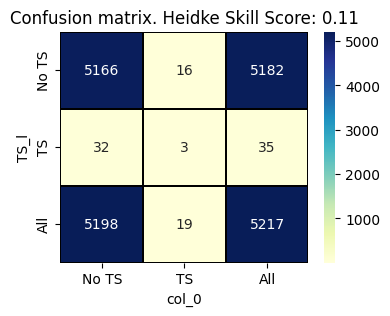

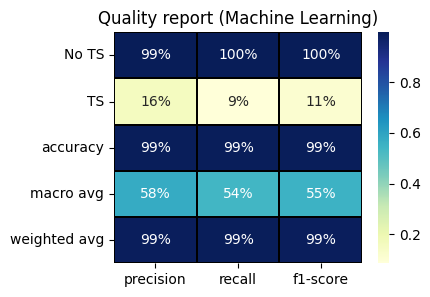

,feature,feature_per
16,cin0,4.5%
8,visibility0,3.5%
44,cfm1,3.0%
0,dir0,2.9%
41,cin1,2.9%
34,lhflx1,2.8%
52,dayofyear,2.8%
40,cape1,2.8%
50,hour,2.7%
25,dir1,2.7%


Round 4


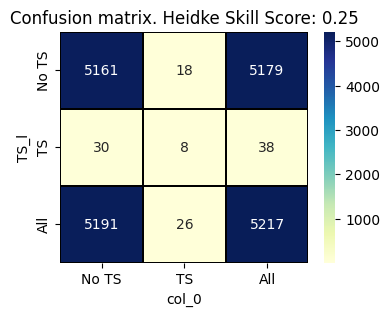

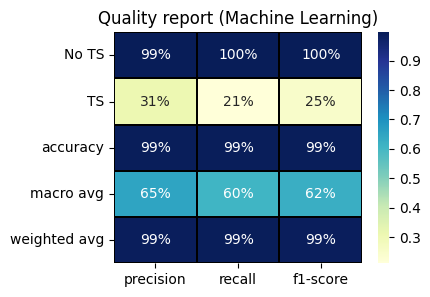

,feature,feature_per
16,cin0,3.6%
40,cape1,3.6%
8,visibility0,3.2%
15,cape0,3.1%
25,dir1,3.0%
0,dir0,3.0%
41,cin1,2.9%
34,lhflx1,2.8%
32,rh1,2.7%
39,shflx1,2.5%


Round 5


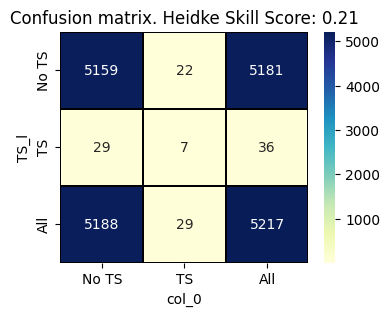

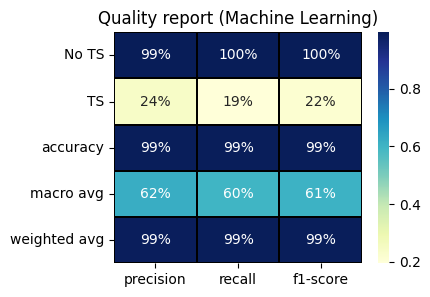

,feature,feature_per
25,dir1,3.5%
32,rh1,3.2%
16,cin0,3.2%
39,shflx1,3.1%
40,cape1,3.1%
33,visibility1,3.0%
41,cin1,3.0%
8,visibility0,3.0%
52,dayofyear,2.5%
0,dir0,2.5%


Round 6


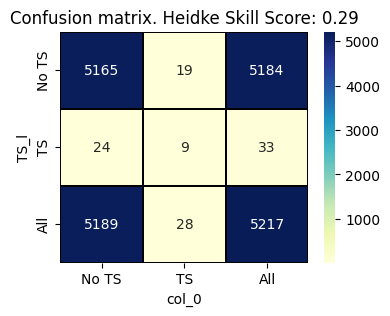

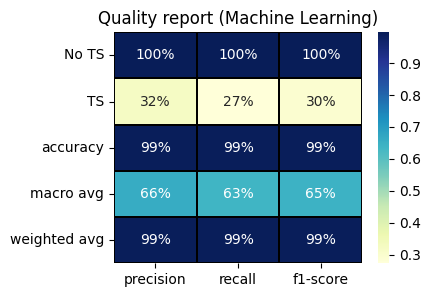

,feature,feature_per
41,cin1,3.6%
25,dir1,3.5%
8,visibility0,3.3%
16,cin0,3.2%
39,shflx1,3.0%
34,lhflx1,2.9%
40,cape1,2.9%
15,cape0,2.7%
52,dayofyear,2.6%
12,prec0,2.5%


Round 7


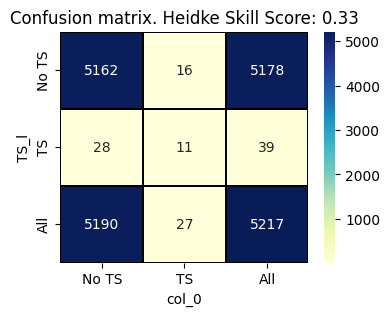

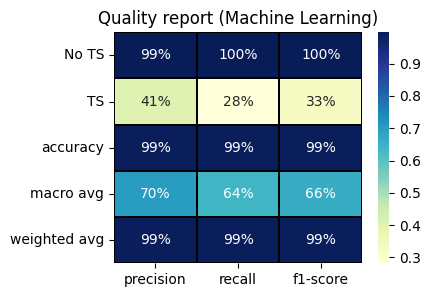

,feature,feature_per
40,cape1,3.5%
16,cin0,3.4%
41,cin1,3.4%
25,dir1,3.2%
0,dir0,3.2%
33,visibility1,3.0%
52,dayofyear,3.0%
8,visibility0,2.9%
39,shflx1,2.9%
50,hour,2.7%


Round 8


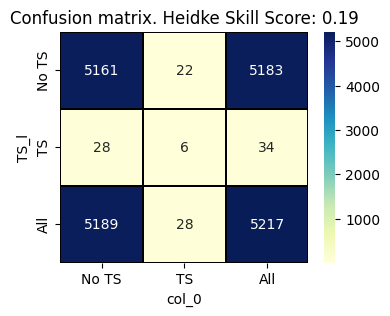

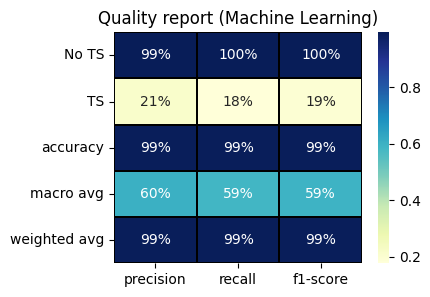

,feature,feature_per
25,dir1,3.6%
8,visibility0,3.3%
41,cin1,3.3%
34,lhflx1,3.2%
52,dayofyear,3.2%
16,cin0,3.2%
32,rh1,3.0%
50,hour,2.6%
0,dir0,2.5%
40,cape1,2.5%


Round 9


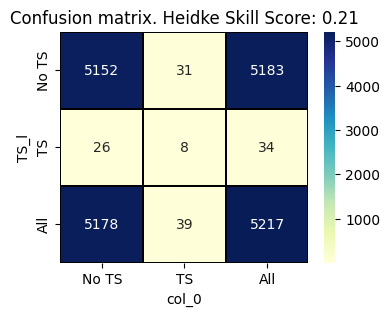

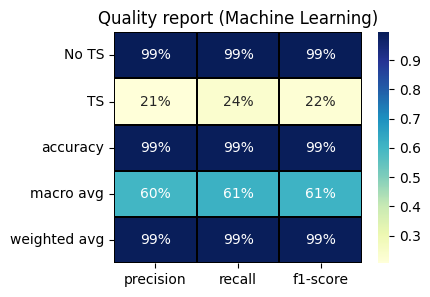

,feature,feature_per
8,visibility0,3.7%
25,dir1,3.4%
16,cin0,3.4%
41,cin1,3.3%
39,shflx1,3.2%
40,cape1,3.2%
52,dayofyear,2.8%
50,hour,2.7%
32,rh1,2.7%
15,cape0,2.6%



HSS stadistics
             HSS
count  10.000000
mean    0.213535
std     0.063476
min     0.106895
25%     0.177551
50%     0.210296
75%     0.237577
max     0.329231
Shapiro test normality
p value: 0.852149486541748
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 1.779548111423417e-47
Significance level: 0.01
Degres of of freedom:  1
Stadistic 209.48461093265746
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.05 minutes


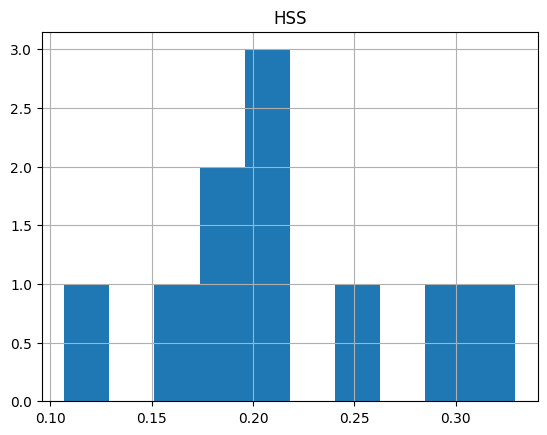

In [14]:
#@title ML LGBMClassifier. Samples 10. Heidke Skill score

start_time = time.time()

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.TS_l
X = df_all.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])



print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")

In [16]:
#@title Save last algorithm round 9


x_var = X.columns
score = {"HSS_ml":HSS[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/algorithms/TS_LEBL_d1.al", 'wb'))

Round 0


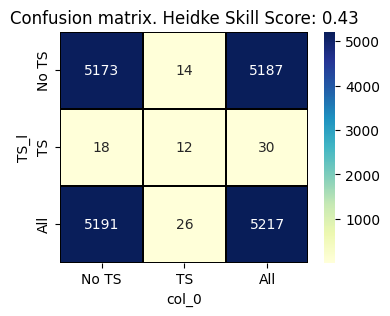

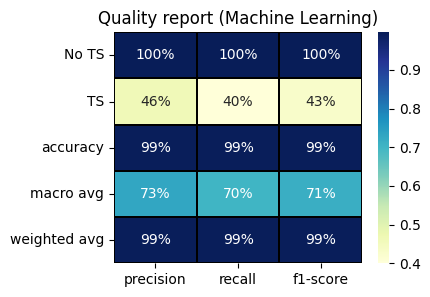

,feature,feature_per
40,cape1,7.3%
15,cape0,4.4%
18,cfl0,4.1%
25,dir1,3.8%
0,dir0,3.8%
20,cft0,3.6%
45,cft1,3.5%
11,conv_prec0,3.4%
36,conv_prec1,2.9%
10,lwflx0,2.6%


Round 1


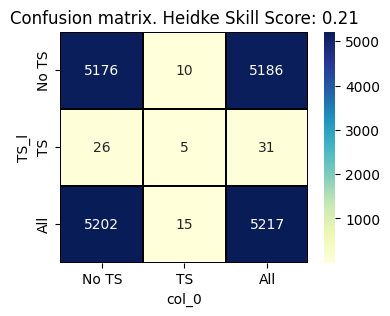

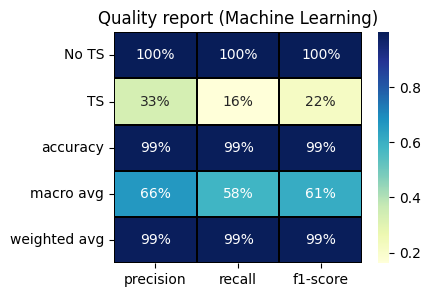

,feature,feature_per
40,cape1,5.6%
15,cape0,4.6%
18,cfl0,4.5%
25,dir1,4.2%
20,cft0,3.8%
11,conv_prec0,3.5%
36,conv_prec1,3.5%
43,cfl1,3.2%
10,lwflx0,2.8%
0,dir0,2.8%


Round 2


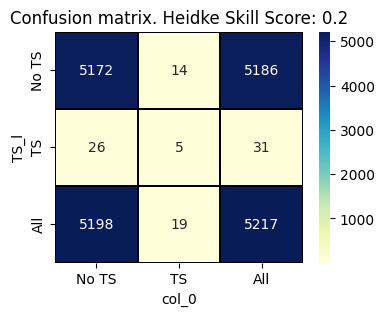

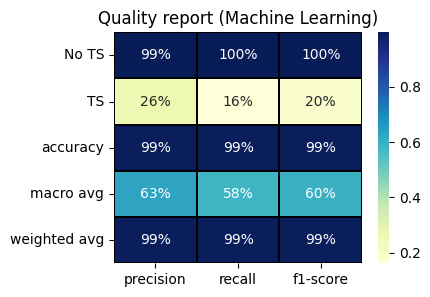

,feature,feature_per
15,cape0,5.8%
40,cape1,5.5%
43,cfl1,4.1%
25,dir1,4.0%
0,dir0,3.7%
18,cfl0,3.5%
11,conv_prec0,3.3%
36,conv_prec1,3.2%
20,cft0,2.9%
35,lwflx1,2.7%


Round 3


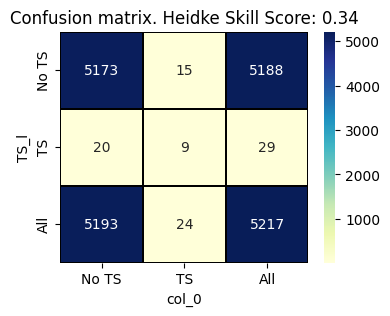

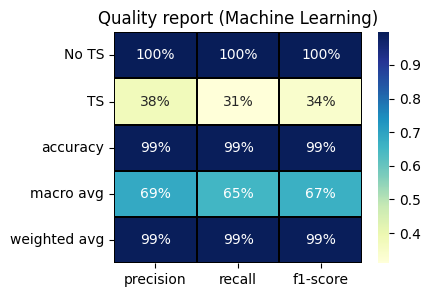

,feature,feature_per
40,cape1,6.6%
15,cape0,5.0%
18,cfl0,4.5%
43,cfl1,3.7%
11,conv_prec0,3.7%
20,cft0,3.6%
25,dir1,3.6%
36,conv_prec1,3.0%
35,lwflx1,2.8%
45,cft1,2.8%


Round 4


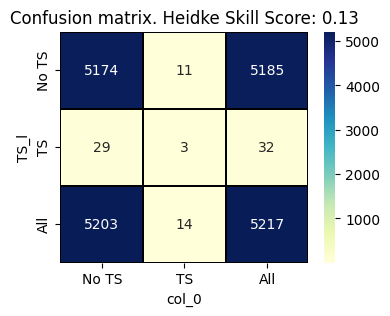

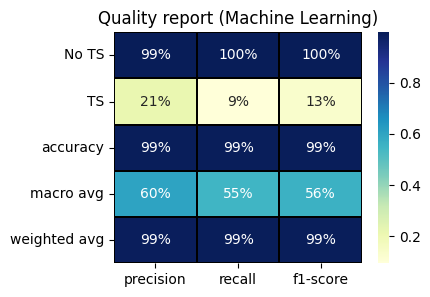

,feature,feature_per
40,cape1,5.7%
15,cape0,5.0%
36,conv_prec1,4.6%
25,dir1,4.5%
11,conv_prec0,3.4%
18,cfl0,3.4%
45,cft1,3.3%
20,cft0,3.3%
0,dir0,3.0%
43,cfl1,2.9%


Round 5


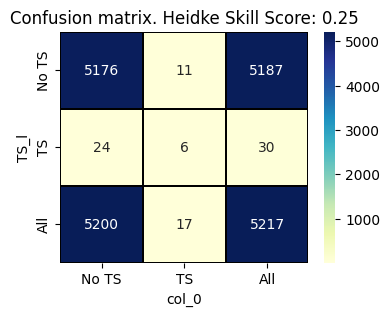

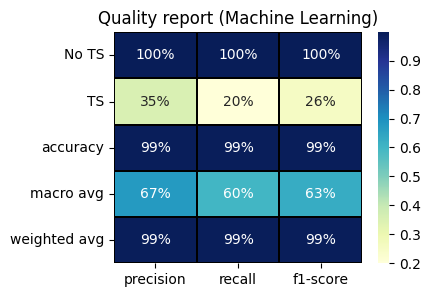

,feature,feature_per
40,cape1,5.9%
15,cape0,4.7%
25,dir1,4.4%
36,conv_prec1,4.4%
20,cft0,4.0%
18,cfl0,3.4%
11,conv_prec0,3.4%
0,dir0,3.3%
37,prec1,2.8%
10,lwflx0,2.6%


Round 6


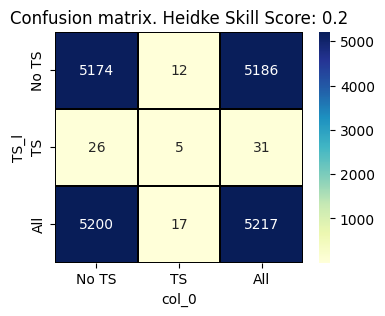

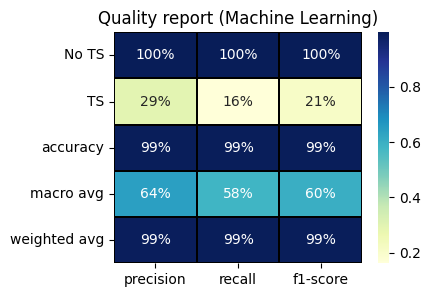

,feature,feature_per
40,cape1,6.4%
18,cfl0,5.1%
15,cape0,5.0%
11,conv_prec0,4.9%
25,dir1,4.2%
20,cft0,3.1%
36,conv_prec1,2.9%
43,cfl1,2.8%
0,dir0,2.8%
10,lwflx0,2.8%


Round 7


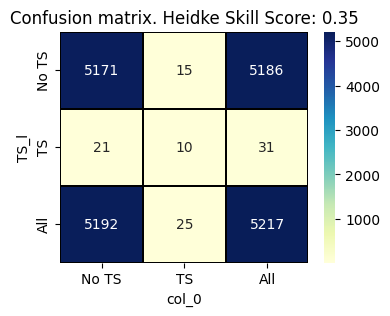

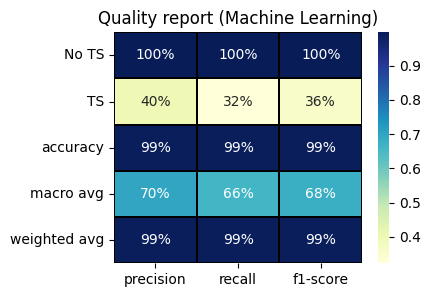

,feature,feature_per
40,cape1,6.6%
15,cape0,5.1%
36,conv_prec1,4.7%
25,dir1,4.2%
18,cfl0,3.3%
11,conv_prec0,3.2%
0,dir0,3.2%
43,cfl1,3.0%
20,cft0,2.9%
21,HGT5000,2.3%


Round 8


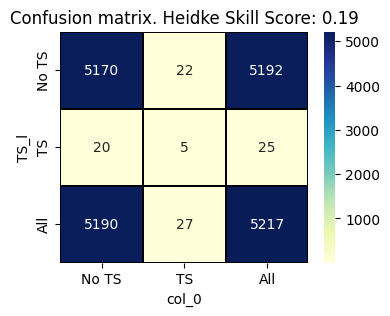

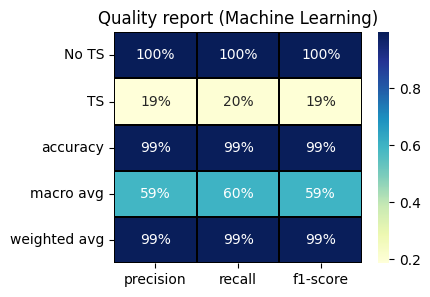

,feature,feature_per
40,cape1,6.1%
18,cfl0,4.8%
25,dir1,4.4%
15,cape0,3.9%
36,conv_prec1,3.8%
11,conv_prec0,3.2%
37,prec1,3.1%
45,cft1,3.0%
43,cfl1,2.9%
10,lwflx0,2.7%


Round 9


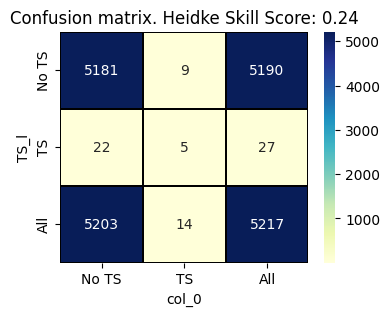

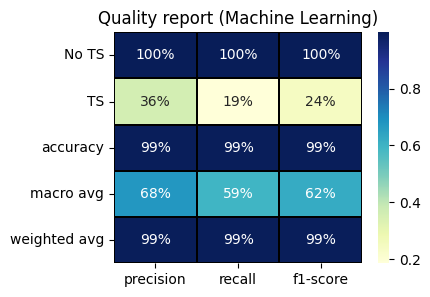

,feature,feature_per
40,cape1,6.1%
18,cfl0,4.7%
15,cape0,4.5%
43,cfl1,4.2%
25,dir1,3.6%
45,cft1,3.5%
11,conv_prec0,3.4%
36,conv_prec1,3.4%
37,prec1,3.3%
20,cft0,2.8%



HSS stadistics
             HSS
count  10.000000
mean    0.254008
std     0.090673
min     0.127176
25%     0.198525
50%     0.227784
75%     0.315263
max     0.425504
Shapiro test normality
p value: 0.45647183060646057
Accept null hypothesis: normal distribution variable HSS in the samples
chi2_contingency last round
p-value: 2.9362834812803443e-61
Significance level: 0.01
Degres of of freedom:  1
Stadistic 272.6938912541405
Reject H0,There is an association between machine learning forecast and observed values
Execution time: 1.11 minutes


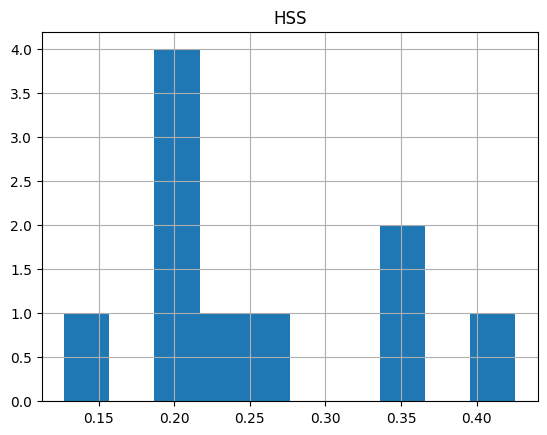

In [17]:
#@title ML RandomForestClassifier. Samples 10. Heidke Skill score.
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

start_time = time.time()

#random seed 1
np.random.seed(31)

# X and Y
Y = df_all.TS_l
X = df_all.iloc[:,1:]


# loop random
HSS_E = []
for t in range (0,10):
  print("Round",t)
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #train model
  #ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  ml_model = ExtraTreesClassifier().fit(X_res,y_res)
  #ml_model = Perceptron().fit(X_res,y_res)
  #ml_model = RandomForestClassifier().fit(X_res,y_res)

  #Confusion matrix
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_E.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  plt.figure(figsize=(4, 3))
  plt.title("Confusion matrix. Heidke Skill Score: {}".format(round(HSS_E[t],2)))
  seab = sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f',linewidths=.2,linecolor='black');
  plt.show()

  #quality report
  plt.figure(figsize=(4, 3))
  plt.title("Quality report (Machine Learning)")
  qr = pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
  seab = sns.heatmap(qr.iloc[:,:-1],annot=True,cmap="YlGnBu",fmt='.0%',linewidths=.2,linecolor='black');
  plt.show()

  #feature importance
  def format_as_percentage(value):
      return '{:.1%}'.format(value)
  fea_imp =pd.DataFrame({"feature":X.columns,
                      "importance":[(importance/(sum(ml_model.feature_importances_))) for importance in ml_model.feature_importances_]})
  fea_imp["feature_per"] =  fea_imp['importance'].map(format_as_percentage)
  fea_sort = fea_imp.sort_values(by="importance",ascending=False)
  display(fea_sort[["feature","feature_per"]][:10])

print("\nHSS stadistics")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset

print(pd.DataFrame(HSS_E,columns=["HSS"]).describe())

#sample less 5000
sta, p = shapiro(HSS_E)
print("Shapiro test normality")
print("p value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")



pd.DataFrame(HSS_E,columns=["HSS"]).hist();

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
print("chi2_contingency last round")
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables
alpha = 0.01
print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")

#time
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", round(execution_time/60,2), "minutes")



In [20]:
#@title Save last heavy algorithm round 9
x_var = X.columns
score = {"HSS_ml":HSS_E[-1]}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)

al_file={"x_var":x_var,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEBL/algorithms/ts_LEBL_d1.al", 'wb'))